In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,r2_score,confusion_matrix,accuracy_score

# EDA

In [2]:
df = pd.read_csv('Data/Titanic_train.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6224\2940318962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [11]:
df['Age'].isnull().sum()

np.int64(0)

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6224\1994620826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [13]:
df['Embarked'].isnull().sum()

np.int64(0)

In [14]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6224\2155554685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True)


In [15]:
df['Cabin'].isnull().sum()

np.int64(0)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

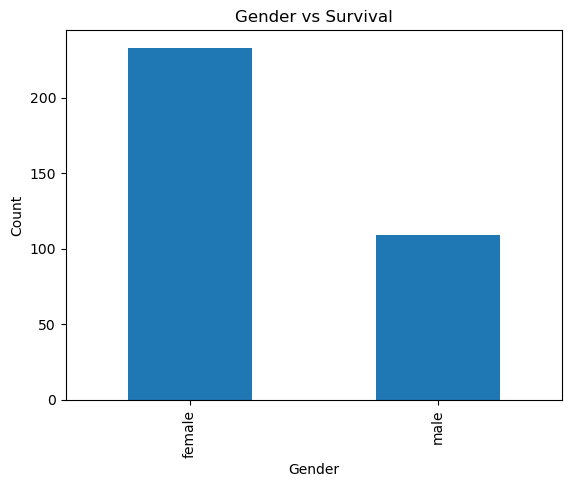

In [17]:
df[df["Survived"] == 1]["Sex"].value_counts().plot(kind="bar")
plt.title('Gender vs Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

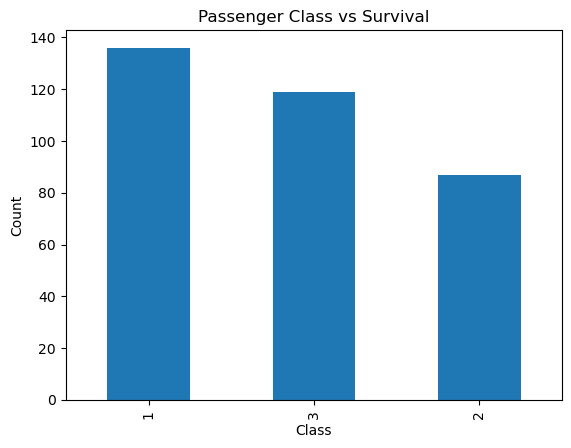

In [18]:
df[df["Survived"] == 1]["Pclass"].value_counts().plot(kind="bar")
plt.title('Passenger Class vs Survival')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [19]:
bins = [0, 12, 25, 60, 100]
labels = ['Child', 'Young', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [20]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Adult


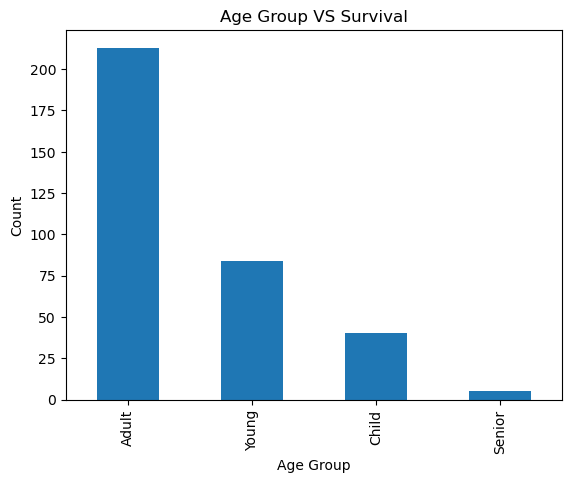

In [21]:
df[df['Survived']== 1]['AgeGroup'].value_counts().plot(kind='bar')
plt.title('Age Group VS Survival')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [22]:
bins = [0,130,390,520]
labels = ['LowerC', 'MiddleC', 'RichC']

df['SocialClass'] = pd.cut(df['Fare'], bins=bins, labels=labels)

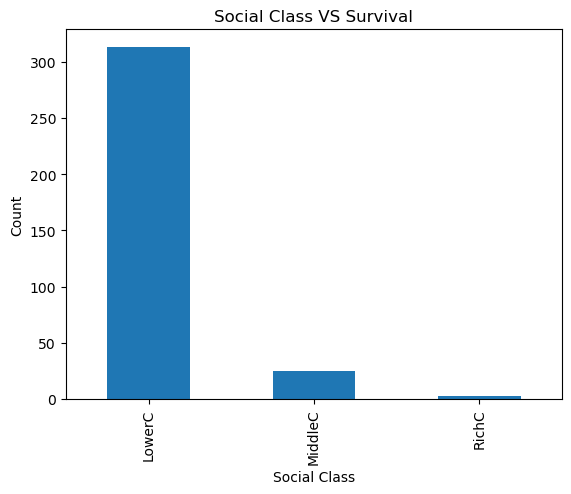

In [23]:
df[df['Survived']== 1]['SocialClass'].value_counts().plot(kind='bar')
plt.title('Social Class VS Survival')
plt.xlabel('Social Class')
plt.ylabel('Count')
plt.show()

In [24]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [25]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [26]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [27]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,SocialClass
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,0,Young,LowerC
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,Adult,LowerC


In [28]:
df.drop(['PassengerId','Name','Ticket','AgeGroup','SocialClass'], axis=1, inplace=True)

In [29]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,B96 B98,0
1,1,1,0,38.0,1,0,71.2833,C85,1


In [30]:
df.drop('Cabin',axis=1,inplace=True)

In [31]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [32]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
model_pred = model.predict(X_test)

In [36]:
print("Classification Report:\n", classification_report(y_test,model_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [37]:
print("Confusion Matrix:\n", confusion_matrix(y_test,model_pred))

Confusion Matrix:
 [[89 16]
 [21 53]]


In [38]:
print("Accuracy:\n", accuracy_score(y_test, model_pred))

Accuracy:
 0.7932960893854749


In [39]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(model, "titanic_model.pkl")


print("Model saved successfully!")

Model saved successfully!


In [40]:
df[df['Survived']==1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
8,1,3,0,27.0,0,2,11.1333,0
9,1,2,0,14.0,1,0,30.0708,1
...,...,...,...,...,...,...,...,...
875,1,3,0,15.0,0,0,7.2250,1
879,1,1,0,56.0,0,1,83.1583,1
880,1,2,0,25.0,0,1,26.0000,0
887,1,1,0,19.0,0,0,30.0000,0
